<a href="https://colab.research.google.com/github/danaa03/Machine-Learning-Practice/blob/main/2_Car_Price_Prediction_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 18.1k/18.1k [00:00<00:00, 14.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hellbuoy/car-price-prediction/versions/1


In [4]:
import os
print(os.listdir(path))


['Data Dictionary - carprices.xlsx', 'CarPrice_Assignment.csv']


In [6]:
import pandas as pd
data = pd.read_csv(path + '/CarPrice_Assignment.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


📊 Columns in the dataset:

car_ID → Unique ID for each record.

symboling → Risk factor rating (-3 to +3). Higher = more risky.

CarName → Car brand + model (e.g., toyota corolla).

fueltype → gas or diesel.

aspiration → Turbo or standard (turbo / std).

doornumber → Number of doors (two / four).

carbody → Body style (sedan, hatchback, wagon, hardtop, convertible).

drivewheel → Drive system (fwd, rwd, 4wd).

enginelocation → front or rear.

wheelbase → Distance between front & rear wheels (continuous).

carlength

carwidth

carheight

curbweight → Weight of the car without passengers.

enginetype → Engine type (e.g., ohc, ohcv, rotor).

cylindernumber → Number of cylinders (four, six, eight, etc.).

enginesize → Engine displacement.

fuelsystem → Fuel system type (mpfi, 2bbl, spdi, etc.).

boreratio

stroke

compressionratio

horsepower

peakrpm

citympg

highwaympg

price → 💰 Target variable (continuous). ---------------> REGRESSION

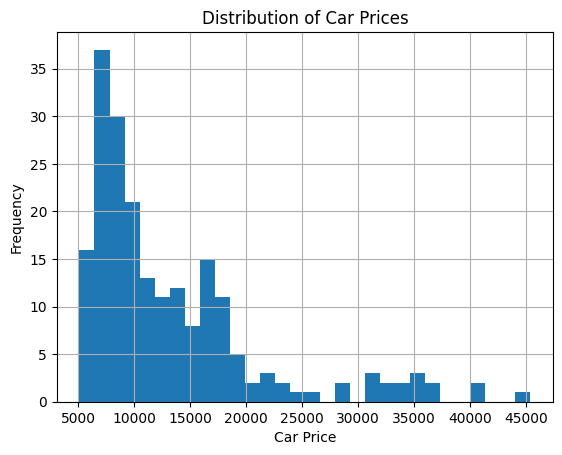

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [11]:
import matplotlib.pyplot as plt

data['price'].hist(bins=30)
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()

print(data['price'].describe())

In [13]:
print(data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [14]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col} → {data[col].nunique()} unique values")
    print(data[col].value_counts().head(), "\n")

CarName → 147 unique values
CarName
peugeot 504             6
toyota corolla          6
toyota corona           6
subaru dl               4
mitsubishi outlander    3
Name: count, dtype: int64 

fueltype → 2 unique values
fueltype
gas       185
diesel     20
Name: count, dtype: int64 

aspiration → 2 unique values
aspiration
std      168
turbo     37
Name: count, dtype: int64 

doornumber → 2 unique values
doornumber
four    115
two      90
Name: count, dtype: int64 

carbody → 5 unique values
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64 

drivewheel → 3 unique values
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64 

enginelocation → 2 unique values
enginelocation
front    202
rear       3
Name: count, dtype: int64 

enginetype → 7 unique values
enginetype
ohc     148
ohcf     15
ohcv     13
dohc     12
l        12
Name: count, dtype: int64 

cylindernumber → 7 unique values
cylindernumb

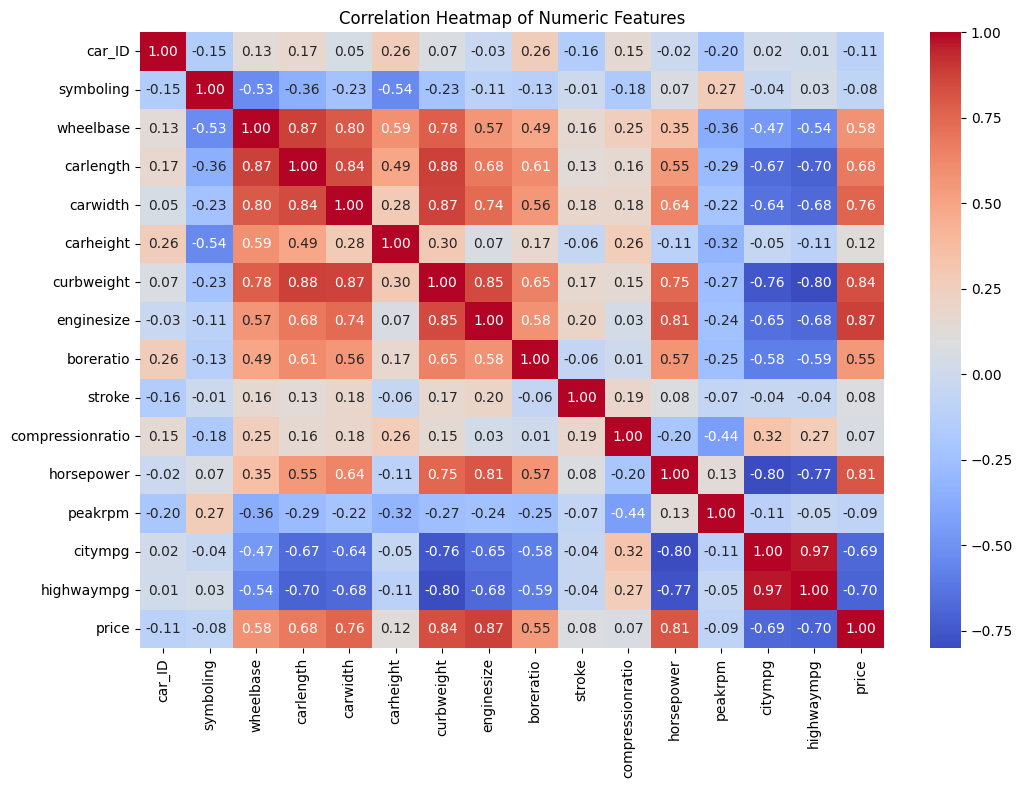

In [16]:
# for numeric variables, to spot multi-collineaity
num_cols = data.select_dtypes(include=['int64','float64']).columns

# Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()